# 비전 기능

# 개요
GPT-4o는 언어 처리와 시각적 이해를 모두 포함합니다.  
이 멀티모달 기능은 모델이 텍스트뿐만 아니라 이미지를 기반으로 내용을 이해하고 생성할 수 있도록 합니다.  
이는 이미지 캡션 생성, 시각적 질문 응답, 시각적 콘텐츠에 대한 상세 설명 생성 등 다양한 응용 프로그램에 사용할 수 있습니다.

더 자세한 예시는 공식 문서 [GPT With Vision](https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/gpt-with-vision?tabs=rest%2Csystem-assigned%2Cresource)을 참조하세요.

### GPT-4o를 사용하여 이미지 설명하기
GPT-4o를 사용하면 텍스트 입력과 함께 이미지를 처리하고 이해할 수 있습니다. \
이 예제는 GPT-4o 모델에 이미지를 전송하고 설명 텍스트 출력을 얻는 방법을 보여줍니다.

---
**사전 준비** \
GPT-4o 모델을 사용하기 위한 Azure OpenAI 리소스 접근 권한.

#### 1. 작업할 이미지를 표시하기

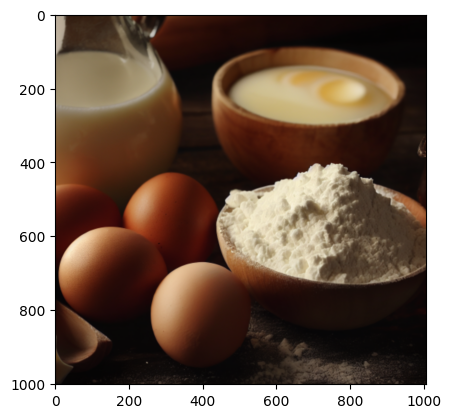

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_PATH = "./data/ingredients.png"

img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()


#### 2. 도우미 라이브러리를 가져오고 설정 구성하기

In [2]:
import os
import requests
import base64

from dotenv import load_dotenv

load_dotenv()

GPT4V_KEY = os.getenv('AZURE_OPENAI_KEY')
GPT4V_ENDPOINT = f"{os.getenv('AZURE_OPENAI_ENDPOINT')}openai/deployments/{os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')}/chat/completions?api-version=2024-12-01-preview"


#### 3. 이미지 인코딩 및 요청 처리를 위한 함수 생성하기

In [3]:
def encode_image_to_base64(image_path):
    """Read and encode the image file to base64."""
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('ascii')
    return encoded_image

def send_request(endpoint, headers, payload):
    """Send the API request and return the response."""
    try:
        response = requests.post(endpoint, headers=headers, json=payload)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        return response.json()
    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

#### 4. 이미지와 질문을 LLM에 전달하기

이미지를 base64로 인코딩한 후, 질문과 함께 LLM API에 전송합니다.

In [4]:

encoded_image = encode_image_to_base64(IMAGE_PATH)
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          # "text": "사진에 대해 자세히 설명해줘"
          # "text": "사진에 있는 재료로 맛있는 요리법 알려줘"
          "text": "계란 4개 있는거 아냐?"
        }
      ]
    }
  ],
  "temperature": 0.7,
  "top_p": 0.95,
  "max_tokens": 800
}

response_json = send_request(GPT4V_ENDPOINT, headers, payload)

print(response_json['choices'][0]['message']['content'])

네, 맞아요! 이미지에는 계란이 4개 있습니다.


#### 탐색할 사용 사례
1. **콘텐츠 생성** \
블로그, 소셜 미디어 및 기타 콘텐츠 플랫폼에 사용되는 이미지 기반 설명, 요약, 해시태그, 메타데이터를 자동으로 생성합니다.

2. **접근성** \
시각 장애인을 포함한 더 많은 사용자가 디지털 콘텐츠에 접근할 수 있도록 상세한 이미지 설명을 제공합니다.

3. **이미지 분류** \
이미지를 사전 정의된 카테고리로 분류하거나, 콘텐츠 적합성 평가(안전성/성인/폭력 등) 작업에도 활용할 수 있습니다.

4. **전자상거래** \
제품 이미지를 기반으로 자동 제품 설명, 속성 추출(색상, 재질, 스타일 등), 유사 제품 추천에 활용할 수 있습니다.

5. **시각적 데이터 추출(OCR+)** \
영수증, 명함, 표, 문서 이미지에서 텍스트를 추출하고 이를 구조화해 분석하거나 저장할 수 있습니다.

6. **의료 이미지 보조 분석** \
X-ray, CT, MRI 등의 의료 이미지를 설명하고, 잠재적 이상점을 보조적으로 식별하는 데 사용됩니다.

7. **비전 기반 Assistive AI** \
카메라 영상을 실시간으로 해석해서 객체 인식, 위험 감지, 공간 설명 등 다양한 “Sight-to-Language” 기능을 제공할 수 있습니다.

8. **문서/그래프/차트 해석** \
차트나 그래프의 의미를 요약하거나, PDF 스캔 문서의 구조를 이해하여 데이터 포인트를 자연어로 설명합니다.

---

# 🎯 실습 과제: AI 도슨트 만들기

## 과제 목표

지금까지 배운 **프롬프트 엔지니어링 기법**과 **Vision API**를 결합하여 명화를 설명하는 AI 도슨트를 만들어보세요.

---

## 📝 과제 내용

빈센트 반 고흐의 **"별이 빛나는 밤"** 작품 이미지를 사용하여:

1. **역할 놀이 (Role-Playing)** 적용
   - System 프롬프트에 "미술 도슨트 전문가" 역할 정의

2. **명확한 지침 작성**
   - 작품 설명 방식 지정 (작가, 시대, 기법, 의미 등)
   - 출력 형식 정의 (섹션별 구분)

3. **다양한 청중 대상 설명**
   - 전문가용 설명
   - 비전문가용 쉬운 설명
   - 핵심만 간단히 (3줄 요약)
---

## 💡 요구사항

### 필수 구현:
- ✅ 이미지 경로: `image/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg`
- ✅ System/User 역할 분리
- ✅ 스타일 설명 (전문가/비전문가)
- ✅ 각 스타일마다 적절한 temperature 설정

### 참고할 이전 노트북:
- **02_ChatCompletion_api.ipynb**: System/User 프롬프트 구조
- **05_OpenAI_parameters.ipynb**: temperature 효과
- **07_prompt_engineering.ipynb**: 역할 정의, 출력 형식 지정

---

## 🔍 추가 도전 과제

1. **구조화된 출력**
   - JSON 형식으로 작품 정보 추출
   ```json
   {
     "작품명": "별이 빛나는 밤",
     "작가": "빈센트 반 고흐",
     "제작연도": 1889,
     "주요_색상": ["파랑", "노랑", "흰색"],
     "핵심_요소": ["소용돌이 하늘", "사이프러스 나무", "초승달"]
   }
   ```

2. **작품 비교**
   - 같은 이미지를 temperature 0.1, 0.5, 0.9로 각각 분석
   - 출력 차이 비교

3. **특정 요소 집중 분석**
   - "이 그림에서 소용돌이 패턴의 의미를 설명해주세요"
   - "색채 사용의 특징을 분석해주세요"

---

## 📌 시작 코드

```python
from PIL import Image
import matplotlib.pyplot as plt

# 1. 이미지 표시
IMAGE_PATH = "./image/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()

# 2. 이미지 인코딩
encoded_image = encode_image_to_base64(IMAGE_PATH)

# 3. TODO: System 프롬프트 작성 (도슨트 역할 정의)
# 4. TODO: User 프롬프트 작성 (어떤 설명을 원하는지)
# 5. TODO: API 호출 및 결과 출력
```

**이제 여러분이 직접 완성해보세요!** 🚀

---

<details>
<summary><strong>📝 샘플 답안 보기</strong> (클릭하여 펼치기/접기)</summary>

<br>

### 샘플 답안: AI 도슨트 구현

#### 방법 1: 전문가용 설명

```python
from PIL import Image
import matplotlib.pyplot as plt

# 1. 이미지 표시
IMAGE_PATH = "./image/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()

# 2. 이미지 인코딩
encoded_image = encode_image_to_base64(IMAGE_PATH)
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

# 3. System 프롬프트: 전문 도슨트 역할
system_prompt = """당신은 미술관의 전문 도슨트입니다.
명화를 보고 다음 형식으로 상세하게 설명하세요:

🎨 작품명: [작품 제목]
👨‍🎨 작가: [작가 이름]
📅 제작 연도: [연도]
🖼️ 기법: [사용된 기법]
🎭 사조/양식: [미술 사조]

[작품 상세 설명]
- 역사적 배경
- 작가의 의도와 감정
- 주요 기법과 특징
- 미술사적 의의

전문적이고 학술적인 어조로 작성하세요."""

# 4. User 프롬프트
user_prompt = "이 작품을 설명해주세요."

payload = {
    "messages": [
        {"role": "system", "content": [{"type": "text", "text": system_prompt}]},
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}},
                {"type": "text", "text": user_prompt}
            ]
        }
    ],
    "temperature": 0.2,
    "max_tokens": 1000
}

response_json = send_request(GPT4V_ENDPOINT, headers, payload)
print("\n" + "=" * 60)
print(response_json['choices'][0]['message']['content'])
```

---

#### 방법 2: 초등학생용 설명

```python
# System 프롬프트: 어린이 눈높이
system_prompt = """당신은 초등학생을 위한 친절한 미술 선생님입니다.
어린이가 쉽게 이해할 수 있도록 명화를 설명하세요:

- 어려운 용어는 쉬운 말로 풀어서 설명
- 친근하고 재미있는 어조 사용
- 비유와 예시를 많이 활용
- 궁금증을 유발하는 질문 포함

다음 형식으로 설명하세요:

🎨 작품 이름: [쉽게 설명]
👨‍🎨 누가 그렸나요?: [작가 소개]
⏰ 언제 그렸나요?: [연도]

[어린이가 이해하기 쉬운 설명]
- 그림에서 무엇이 보이나요?
- 작가는 왜 이렇게 그렸을까요?
- 이 그림의 특별한 점은?
"""

user_prompt = "이 그림을 설명해주세요."

payload = {
    "messages": [
        {"role": "system", "content": [{"type": "text", "text": system_prompt}]},
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}},
                {"type": "text", "text": user_prompt}
            ]
        }
    ],
    "temperature": 0.5,
    "max_tokens": 1000
}

response_json = send_request(GPT4V_ENDPOINT, headers, payload)
print("\n" + "=" * 60)
print(response_json['choices'][0]['message']['content'])
```

</details>

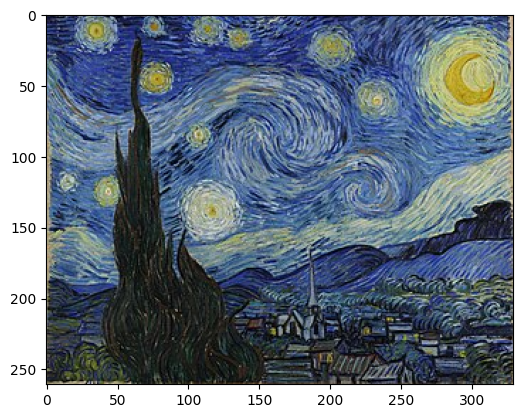

🎨 작품명: 별이 빛나는 밤 (The Starry Night)  
👨‍🎨 작가: 빈센트 반 고흐 (Vincent van Gogh)  
📅 제작 연도: 1889년  
🖼️ 기법: 유화, 캔버스에 유채  
🎭 사조/양식: 후기 인상주의 (Post-Impressionism)

[작품 상세 설명]

- 역사적 배경  
「별이 빛나는 밤」은 1889년 프랑스 남부 생레미 드 프로방스의 생폴 드 모솔 정신병원에 머무르던 빈센트 반 고흐가 창문 밖 풍경을 상상과 결합하여 그린 작품입니다. 이 시기는 반 고흐의 생애 중 극심한 정신적 고통과 우울, 그리고 창작의 열정이 교차하던 시기로, 그는 병원에서의 고독을 예술적 영감으로 승화시켰습니다. 이 작품은 반 고흐가 정신병원에 입원 중이던 시절의 내면 풍경과 외부 세계의 조화로운 융합을 보여줍니다.  

- 작가의 의도와 감정  
반 고흐는 현실의 경관을 단순히 묘사하는 것을 넘어, 자신의 내면적 감정과 우주에 대한 경외를 표현하고자 했습니다. 별빛이 흘러넘치는 강렬한 밤하늘은 고독과 절망 속에서도 자연에 대한 희망과 경탄을 보여줍니다. 작품 속 소용돌이치는 하늘의 에너지와 빛나는 별들은 반 고흐가 느꼈던 심리적 격동과 동시에 우주의 신비로움을 상징합니다. 작가는 신성과 자연, 생명에 대한 경외의식을 색채와 형태를 통해 드러내고자 했으며, 이는 한 편의 서정시와도 같은 예술적 감동을 선사합니다.

- 주요 기법과 특징  
이 작품의 가장 큰 특징은 대담한 붓질과 과감한 색채 사용입니다. 물결치듯 소용돌이치는 하늘의 붓질은 반 고흐 특유의 임파스토(Impasto) 기법으로 두텁고 생동감 있게 표현되었습니다. 밝은 푸른색과 노란색의 강렬한 대비, 그리고 하늘을 가로지르는 역동적 곡선은 고흐 특유의 감정 이입과 주관적 해석을 극대화합니다. 어두운 사이프러스 나무와 교회의 첨탑 등은 수직선이 수평의 마을과 대조를 이루며, 평온한 마을과 요동치는 하늘이 강렬하게 대비됩니다.

- 미술사적 의의  
「별이 빛나는 밤」은 후기 인상주의의 대

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# 1. 이미지 표시
IMAGE_PATH = "./image/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
img = Image.open(IMAGE_PATH)
plt.imshow(img)
plt.show()

# 2. 이미지 인코딩
encoded_image = encode_image_to_base64(IMAGE_PATH)
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

# 3. System 프롬프트: 전문 도슨트 역할
system_prompt = """당신은 미술관의 전문 도슨트입니다.
명화를 보고 다음 형식으로 상세하게 설명하세요:

🎨 작품명: [작품 제목]
👨‍🎨 작가: [작가 이름]
📅 제작 연도: [연도]
🖼️ 기법: [사용된 기법]
🎭 사조/양식: [미술 사조]

[작품 상세 설명]
- 역사적 배경
- 작가의 의도와 감정
- 주요 기법과 특징
- 미술사적 의의

전문적이고 학술적인 어조로 작성하세요."""

# 4. User 프롬프트
user_prompt = "이 작품을 전문 도슨트처럼 상세히 설명해주세요."

payload = {
    "messages": [
        {"role": "system", "content": [{"type": "text", "text": system_prompt}]},
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}},
                {"type": "text", "text": user_prompt}
            ]
        }
    ],
    "temperature": 0.9,  # 사실적이고 일관된 설명
    "max_tokens": 1000
}

response_json = send_request(GPT4V_ENDPOINT, headers, payload)
print("=" * 60)
print(response_json['choices'][0]['message']['content'])